`학과:` 통계학과\
`이름:` 장윤서\
`학번:` 201922034

## 시계열 자료분석 과제 1

#### 필요한 패키지 

In [100]:
library(tidyverse)
library(reshape2)
library(lmtest);

### 1번

#### 1-1 

In [196]:
z <- c(52,46,46,52,50,50,48,45,41,53)
mean(z) #평균

[1] 48.3

#### 1-2

In [197]:
mean(z) #상수평균 모형에 대한 예측값은 주어진 시계열 자료의 평균과 같다

[1] 48.3

#### 1-3

In [151]:
sd_z <- sd(z) #표본 표준 편차
z_h <- mean(z) #표본 평균
t_z <- qt(0.975,9) #신뢰수준
el <- t_z*sqrt((11/10)*(sd_z^2)) #예측구간의 상한,하안 만큼의 차이
el #오차한계
z_h + c(-el,el) #예측 구간

[1] 9.020623

[1] 39.27938 57.32062

### 2번

#### 2-1

Zt = beta_0 + beta_1*t + \epsilon , \epsilon ~ i.i.d N(0,sigma^2)

#### 2-3

In [152]:
z_2 <- c(303,298,303,314,303,314,310,324,317,327,323,324,331,330,332) #보고자 하는 자료
t <- ts(1:15) #시계열 자료의 시점 벡터 

reg <- lm(z_2 ~ t) #선형추세모형 적합
reg %>% summary() #절편, 기울기 확인 및 모형과 개별 회귀 계수의 유의성 확인
reg %>% coef() #회귀 계수 확인

#97.780952 + 2.385714*t #fitted model

b0 <- 297.780952 %>% round(4)
b1 <- 2.385714 %>% round(4)


Call:
lm(formula = z_2 ~ t)

Residuals:
   Min     1Q Median     3Q    Max 
-6.710 -2.331 -1.181  2.519  7.133 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  297.781      2.364 125.964  < 2e-16 ***
t              2.386      0.260   9.176 4.84e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.351 on 13 degrees of freedom
Multiple R-squared:  0.8662,	Adjusted R-squared:  0.856 
F-statistic: 84.19 on 1 and 13 DF,  p-value: 4.836e-07


(Intercept)           t 
 297.780952    2.385714

#### 2-4

In [153]:
c(16,17,18,19,20)*b1 + b0 #예측값

[1] 335.9522 338.3379 340.7236 343.1093 345.4950

### 3번

#### 3-1,2,3,4

z_1,z_2,z_3,z_4
100.33516,500.6577,76.56728,99.38313
101.39095,500.8420,101.44792,103.64486
99.88880,498.7954,105.37818,92.61121
99.37736,497.7076,114.81669,94.90378
99.90365,499.9191,94.49583,104.19280
100.77200,500.9088,77.75432,98.69220


[1] "mts"    "ts"     "matrix" "array"

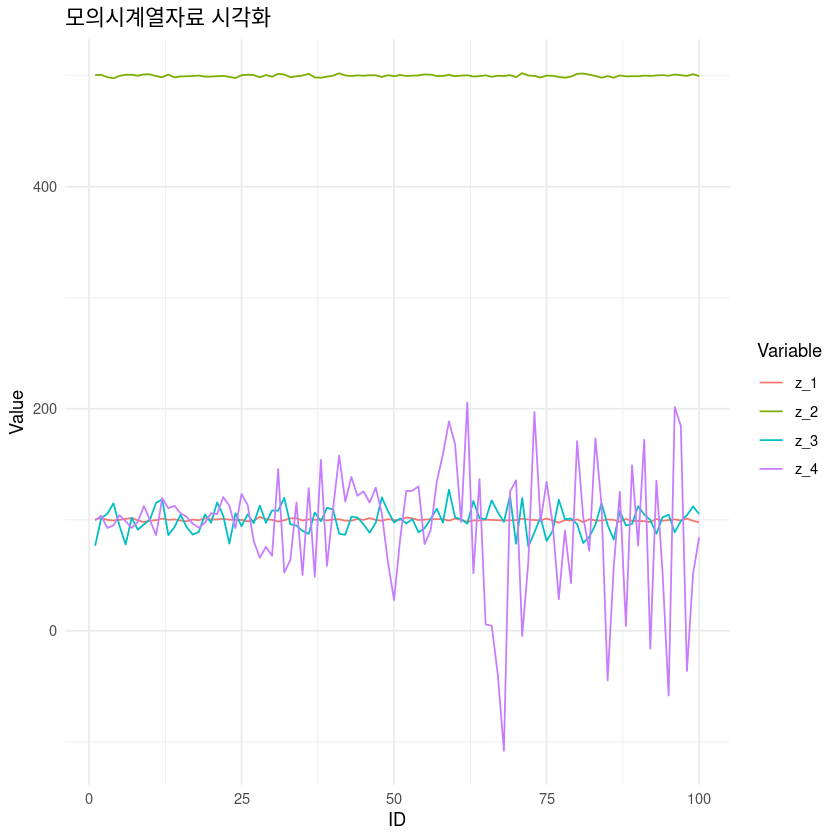

In [188]:
z_1 <- 100 + rnorm(100,0,1) # 100 + N(0,1)인 모의자료
z_2 <- 500 + rnorm(100,0,1) # 100 + N(0,1)인 모의자료
z_3 <- 100 + rnorm(100,0,10) # 100 + N(0,1)인 모의자료
z_4 <- 100 + seq(1,100)*rnorm(100,0,1) #100 + t*N(0,1)인 모의자료
t <- 1:100
#하나의 데이터 프레임으로 묶고 모의 시계열 자료로 만들자
ts_df <- data.frame(z_1,z_2,z_3,z_4) %>% as.ts()
ts_df %>% head()  

ts_df %>% class() #출력이 mts, ts, matrix, array.. 시계열 자료로 잘 변환되었다.
#한번에 시각화

# ggplot을 사용하기 쉽게 long data frame으로 변경
ts_df_long <- ts_df %>% melt()

# ggplot으로 시각화
ggplot(ts_df_long, aes(x = Var1, y = value, color = Var2)) +
  geom_line() +
  labs(x = "ID", y = "Value", color = "Variable") +
  theme_minimal() +
  ggtitle("모의시계열자료 시각화")


#z_1과 z_2 데이터는 상수 평균모형으로 비교적 적은 분산과 각각 100 과 500근처의 값을 취한다.
#반면 z_3은 같은 상수평균모형이지만 분산이 커서 변동이 심하며
#z_4는 처음엔 분산이 크지 않지만 갈 수록 오차항에 붙은 계수가 커져 분산이 커지는 모습을 보인다.

In [157]:
sample_means <- c(z_1 %>% mean() , 
                  z_2 %>% mean() , 
                  z_3 %>% mean() , 
                  z_4 %>% mean()) #표본평균
sample_vs <- c(z_1 %>% var(), 
               z_2 %>% var(), 
               z_3 %>% var(), 
               z_4 %>% var()) #표본분산

thrcl_means <- c(100,500,100,100) #이론적인 평균
thrcl_vs <- c(1,1,100,3383.5) #이론적인 분산

sample_and_theorical_df <- data.frame(sample_means #표본평균
                        ,sample_vs, #표본분산
                        thrcl_means, #이론적인 평균
                        thrcl_vs) #이론적인 분산
sample_and_theorical_df #비교하기 위해 한번에 데이터 프레임으로 반환

sample_means,sample_vs,thrcl_means,thrcl_vs
<dbl>,<dbl>,<dbl>,<dbl>
100.14281,1.111233,100,1.0
499.84647,1.041229,500,1.0
100.34277,86.613427,100,100.0
98.13398,3291.858946,100,3383.5


### 4번

In [106]:
t<- 1:100

z_1 <- 100 + rnorm(100,0,1) %>% ts()
z_2 <- 100 + t + rnorm(100,0,1) %>% ts()
z_3 <- 100 + 0.3*t + sin(2*pi*t/12) +
    cos(2*pi*t/12) + rnorm(100,0,1) %>% ts()

#### 4-1

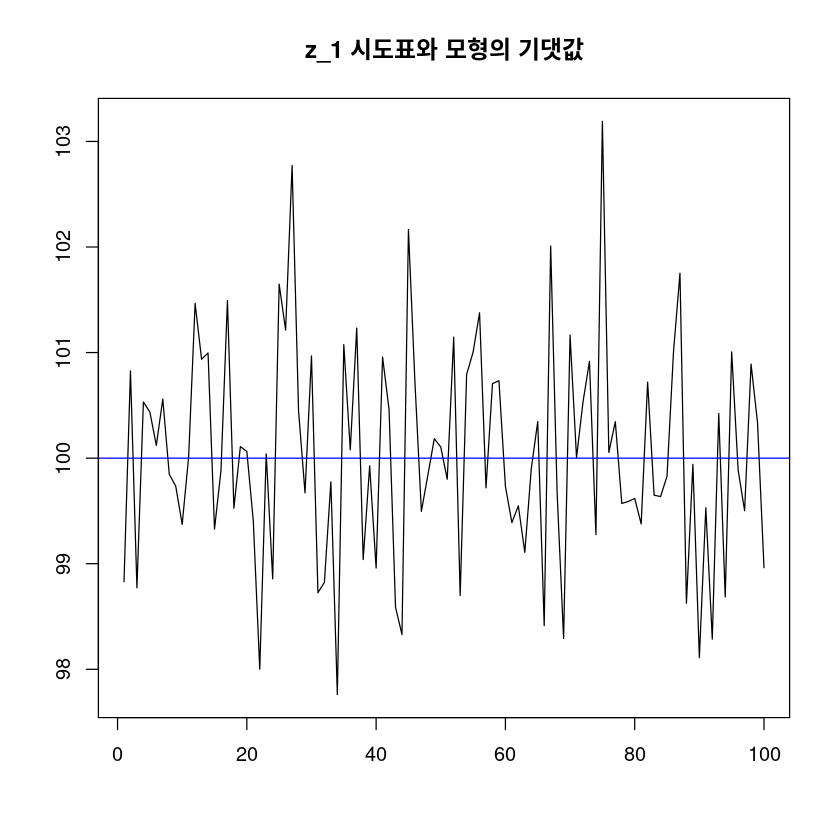

In [107]:
plot(z_1,xlab = '',ylab='',main = 'z_1 시도표와 모형의 기댓값')
abline(h=100,col='blue')
#상수평균모형으로 불규칙성분만을 갖는다.

#### 4-2

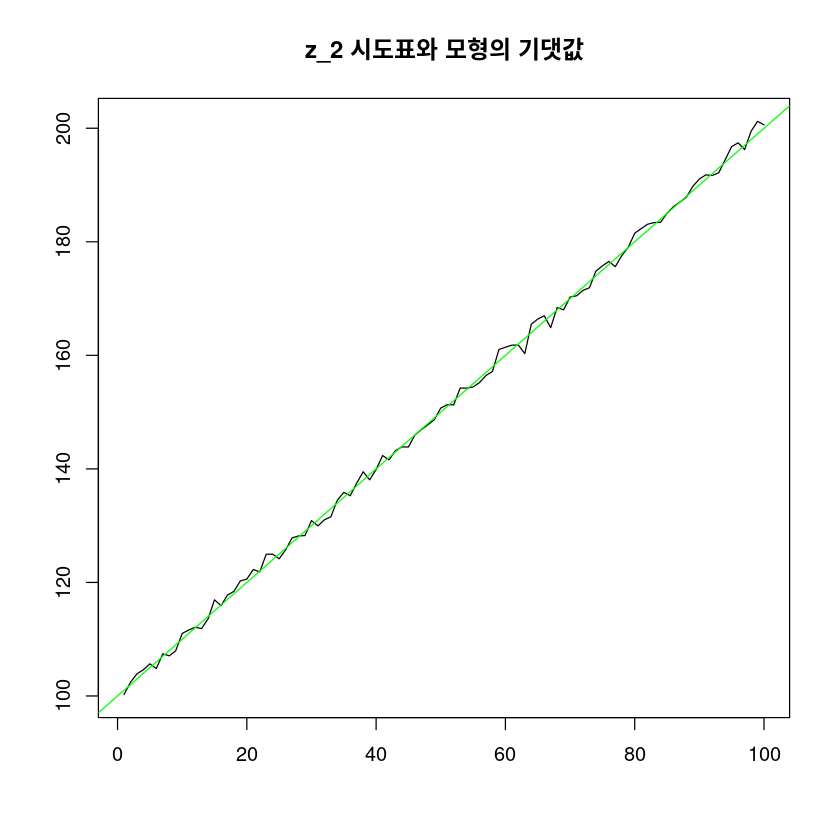

In [108]:
plot(z_2,xlab = '',ylab='',main = 'z_2 시도표와 모형의 기댓값')
abline(a= 100, b= 1,col='green')
#선형추세모형으로 직선형의 추세를 갖는다

#### 4-3

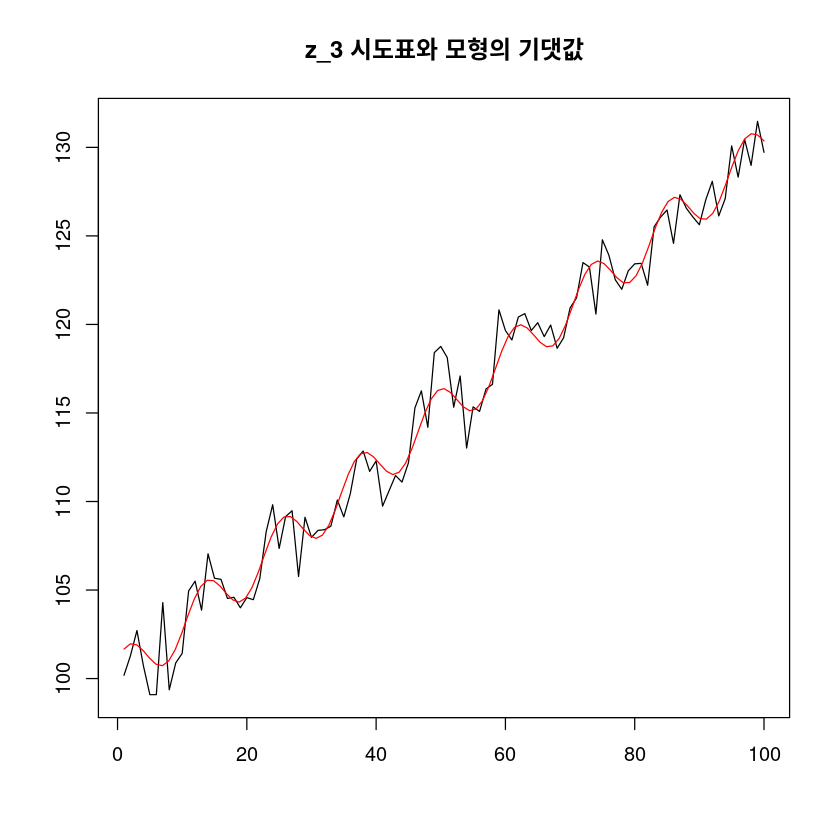

In [147]:
plot(z_3,xlab= '',ylab='', main = 'z_3 시도표와 모형의 기댓값')
curve(100 + 0.3*x + sin(2*pi*x/12) + cos(2*pi*x/12), from =1 , to = 100,add = T,col = 'red')
#선형계절추세모형으로 선형추세성분과 계절성분을 갖는다.

### 5번

In [191]:
books <- scan('book.txt')
t1 <- 1:30
t2 <- t1^2
ts_df <- data.frame(books,t1,t2)

#### 5-1

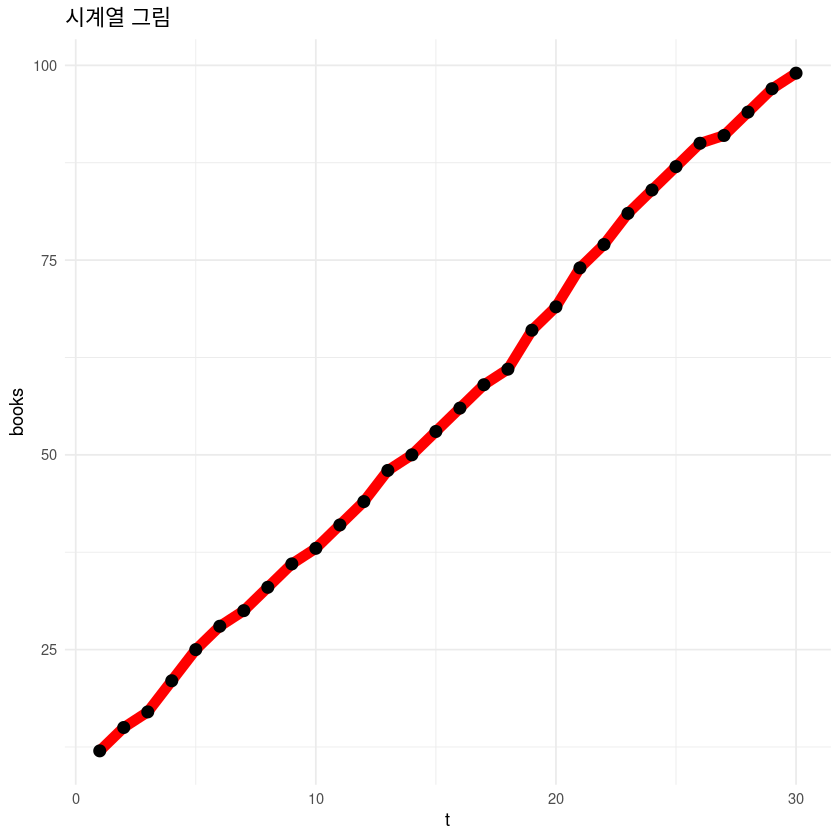

In [192]:
ggplot(data = ts_df, aes(x= t1, y=books)) +
  geom_line(col='red',lwd = 3) +
  geom_point(col = 'black', cex =3) +
  theme_minimal() +
  xlab('t') + 
  ylab('books') +
  ggtitle('시계열 그림');

#### 5-2

In [193]:
#이 시계열 자료는 선형추세 성분을 갖는 것으로 보인다.

#### 5-3

In [194]:
m1 <- lm(books ~ t1, data = ts_df) #최소제곱법을 이용한 적합
m1 %>% coef() #회귀계수 확인
#따라서 적합된 모형은 8.190805 + 3.075862*t

(Intercept)          t1 
   8.190805    3.075862

#### 5-4

In [149]:
#예측값들.
new_data <- data.frame(t1 = 31:42) #predict 함수를 쓰려면 데이터프레임으로 ..
predict(m1, newdata = new_data) %>% round(4)

1        2        3        4        5        6        7        8 
103.5425 106.6184 109.6943 112.7701 115.8460 118.9218 121.9977 125.0736 
       9       10       11       12 
128.1494 131.2253 134.3011 137.3770

#### 5-5

,fit,lwr,upr
,<dbl>,<dbl>,<dbl>
1,103.5425,100.7996,106.2855
2,106.6184,103.8584,109.3784
3,109.6943,106.9162,112.4723
4,112.7701,109.9731,115.5671
5,115.8460,113.0291,118.6629
6,118.9218,116.0842,121.7595
7,121.9977,119.1384,124.8570
8,125.0736,122.1918,127.9554
9,128.1494,125.2443,131.0546


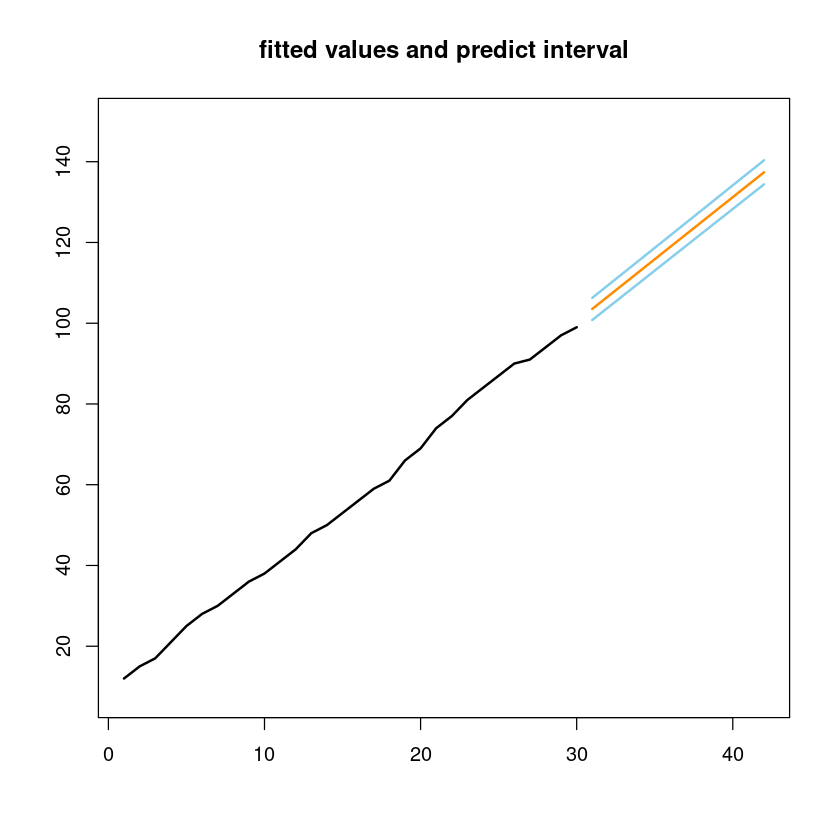

In [158]:
predict_result <- predict(m1, newdata = new_data , interval = 'predict') %>%
    data.frame() #예측 구간을 데이터 프레임으로 반환

predict_result

plot(t1, books,
     main = 'fitted values and predict interval',
     xlab = '', ylab = '',
     xlim = c(1,42), ylim = c(8,150),
     type='l',
     lwd=2)

lines(31:42,predict_result$lwr,col = 'skyblue',lwd = 2) #예측 하한
lines(31:42,predict_result$fit,col = 'darkorange',lwd = 2) #예측값
lines(31:42,predict_result$upr,col = 'skyblue',lwd = 2) #예측 상한

### 6번

In [175]:
z <- scan('export.txt')
export <- ts(z, frequency = 12) #월별로 분석하고 싶으므로 주기를 12로 설정
t<- 1:length(z)

#### 6-1

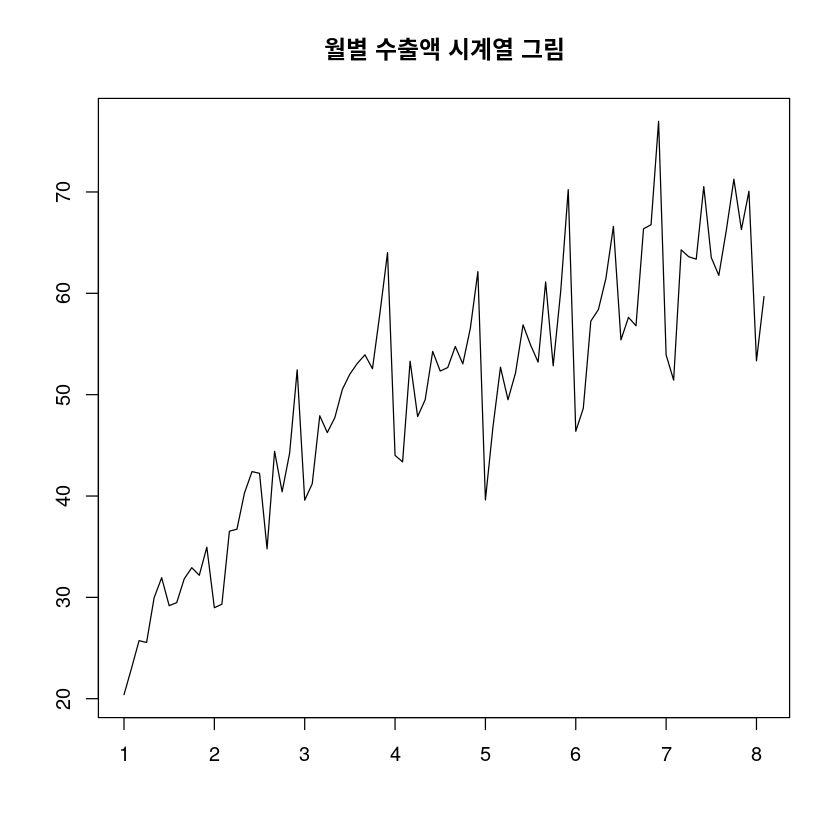

In [176]:
plot.ts(export , main = '월별 수출액 시계열 그림',
     xlab= '', ylab ='') #월별 수출액의 시계열 그림.

#### 6-2

In [177]:
#추세 및 계절성분을 갖는 것으로 보인다.

#### 6-3

In [178]:
ts_data <- data.frame(z = export,
                      freq = as.factor(as.integer(cycle(export))), #지시함수의 주기(가변수)
                      trend = 1:length(export)) #시간 변수
ts_data %>% head()

,z,freq,trend
,<dbl>,<fct>,<int>
1,20.40,1,1
2,23.01,2,2
3,25.73,3,3
4,25.55,4,4
5,29.96,5,5
6,31.94,6,6


In [179]:
#모형 적합
reg <- lm(z ~ 0 + trend + freq,data = ts_data) #beta0 = 0 이라는 제약조건 
summary(reg) #회귀 계수들과 모형의 유의성과 개별 회귀계수의 유의성 확인
reg$coefficients %>% round(4) #회귀 계수들


Call:
lm(formula = z ~ 0 + trend + freq, data = ts_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.8562  -2.2938   0.1567   2.6730   9.3951 

Coefficients:
       Estimate Std. Error t value Pr(>|t|)    
trend   0.43721    0.01893   23.10   <2e-16 ***
freq1  21.98000    1.73500   12.67   <2e-16 ***
freq2  23.69779    1.74396   13.59   <2e-16 ***
freq3  31.19741    1.79669   17.36   <2e-16 ***
freq4  29.35163    1.80455   16.27   <2e-16 ***
freq5  31.28299    1.81257   17.26   <2e-16 ***
freq6  34.94578    1.82076   19.19   <2e-16 ***
freq7  31.14286    1.82910   17.03   <2e-16 ***
freq8  29.71422    1.83760   16.17   <2e-16 ***
freq9  33.05273    1.84626   17.90   <2e-16 ***
freq10 32.66409    1.85507   17.61   <2e-16 ***
freq11 34.35545    1.86403   18.43   <2e-16 ***
freq12 40.55967    1.87314   21.65   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.334 on 73 degrees of freedom
Multiple R-squared:  0.994,

trend   freq1   freq2   freq3   freq4   freq5   freq6   freq7   freq8   freq9 
 0.4372 21.9800 23.6978 31.1974 29.3516 31.2830 34.9458 31.1429 29.7142 33.0527 
 freq10  freq11  freq12 
32.6641 34.3555 40.5597

#### 6-4

In [180]:
reg$coefficients
#trend는 시간이 1달 씩 흐를 때 마다 0.4372092씩 수출액이 증가한다는 뜻이며
#각 회귀 계수들은 계절별 평균 수출액을 의미한다.

trend      freq1      freq2      freq3      freq4      freq5      freq6 
 0.4372092 21.9800023 23.6977930 31.1974107 29.3516300 31.2829922 34.9457830 
     freq7      freq8      freq9     freq10     freq11     freq12 
31.1428594 29.7142216 33.0527266 32.6640888 34.3554510 40.5596703

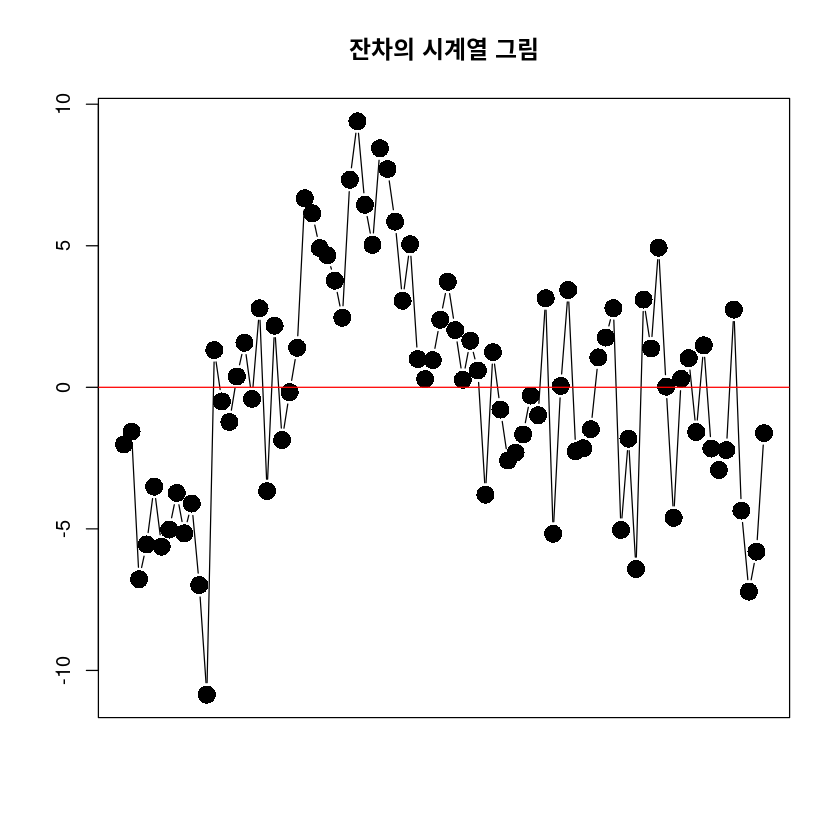

In [181]:
#잔차 분석
par(mfrow= c(1,1))
plot(ts_data$trend, resid(reg),
     pch= 16 , cex =2 , xaxt = 'n', type = 'b',
     xlab= '', ylab ='', main = '잔차의 시계열 그림')
abline(h=0,col = 'red')

In [182]:
shapiro.test(resid(reg)) #정규분포를 따른다고 볼 수 있다.


	Shapiro-Wilk normality test

data:  resid(reg)
W = 0.99429, p-value = 0.9732


In [183]:
dwtest(reg , alternative = 'greater') #양의 상관관계 존재

Warning message in dwtest(reg, alternative = "greater"):
“imaginary parts of eigenvalues discarded”



	Durbin-Watson test

data:  reg
DW = 0.79196, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0


In [184]:
bptest(reg) #유의수준 10%에서도 이분산성을 띄지 않는다 할 수 있다.


	studentized Breusch-Pagan test

data:  reg
BP = 18.466, df = 12, p-value = 0.1023


#### 6-5

In [185]:
new_data <- data.frame(trend = 87:98,freq = factor(1:12)) 
#predict 함수를 쓰려면 데이터프레임으로 ..
predict(reg, newdata = new_data)

1        2        3        4        5        6        7        8 
60.01721 62.17221 70.10903 68.70046 71.06903 75.16903 71.80332 70.81189 
       9       10       11       12 
74.58761 74.63618 76.76475 83.40618

#### 6-6

In [186]:
predict_result <- predict(reg, newdata = new_data, #마지막 관측값으로부터 예측구간
                          interval = 'predict') %>% data.frame()
predict_result

,fit,lwr,upr
,<dbl>,<dbl>,<dbl>
1,60.01721,50.70690,69.32751
2,62.17221,52.86190,71.48251
3,70.10903,60.68477,79.53330
4,68.70046,59.27620,78.12472
5,71.06903,61.64477,80.49330
6,75.16903,65.74477,84.59330
7,71.80332,62.37906,81.22758
8,70.81189,61.38763,80.23615
9,74.58761,65.16334,84.01187


#### 6-7

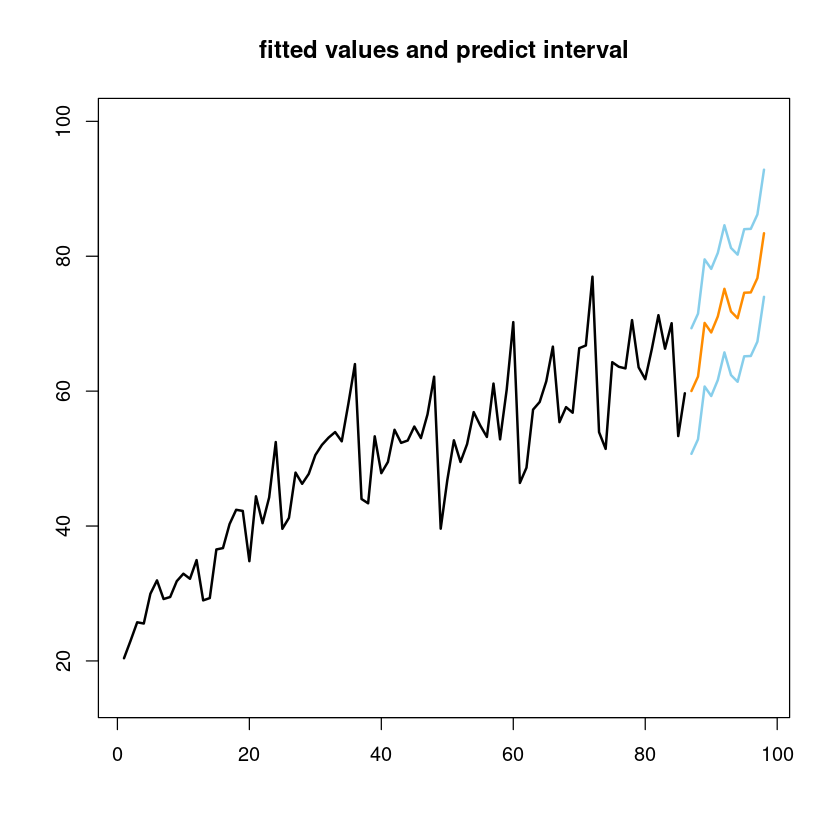

In [187]:
plot(ts_data$trend, ts_data$z , type = 'l', #시도표 시각화
     main = 'fitted values and predict interval',
     xlab = '', ylab = '',
     xlim = c(1,98), ylim = c(15,100),
     lwd=2)

lines(87:98,predict_result$lwr,col = 'skyblue',lwd = 2) #예측 하한
lines(87:98,predict_result$fit,col = 'darkorange',lwd = 2) #예측값
lines(87:98,predict_result$upr,col = 'skyblue',lwd = 2) #예측 상한